In [1]:
#Import libraries

import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

## 1) Import Data

In [2]:
df = pd.read_csv('multiTimeline.csv')

In [3]:
df.head()

,Category: All categories
Week,vegan: (Worldwide)
2014-06-01,31
2014-06-08,31
2014-06-15,31
2014-06-22,32


In [7]:
df.describe()

,Category: All categories
count,262
unique,60
top,36
freq,12


In [9]:
df.shape

(262, 1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, Week to 2019-05-26
Data columns (total 1 columns):
Category: All categories    262 non-null object
dtypes: object(1)
memory usage: 4.1+ KB


In [11]:
## Re-importing data by skipping row
df = pd.read_csv('multiTimeline.csv', skiprows=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
Week                  261 non-null object
vegan: (Worldwide)    261 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


In [15]:
df.head()

,Week,vegan: (Worldwide)
0,2014-06-01,31
1,2014-06-08,31
2,2014-06-15,31
3,2014-06-22,32
4,2014-06-29,32


## Visualise data

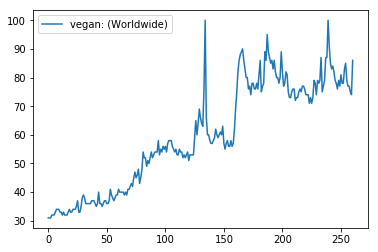

In [16]:
df.plot()

In [17]:
from datetime import datetime

In [18]:
df['Week'] = pd.to_datetime(df['Week'])

In [19]:
df.head()

,Week,vegan: (Worldwide)
0,2014-06-01,31
1,2014-06-08,31
2,2014-06-15,31
3,2014-06-22,32
4,2014-06-29,32


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
Week                  261 non-null datetime64[ns]
vegan: (Worldwide)    261 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


In [22]:
## set index to the date rather than the 0,1,2 column
df.set_index('Week',inplace=True)

In [23]:
df.index

DatetimeIndex(['2014-06-01', '2014-06-08', '2014-06-15', '2014-06-22',
               '2014-06-29', '2014-07-06', '2014-07-13', '2014-07-20',
               '2014-07-27', '2014-08-03',
               ...
               '2019-03-24', '2019-03-31', '2019-04-07', '2019-04-14',
               '2019-04-21', '2019-04-28', '2019-05-05', '2019-05-12',
               '2019-05-19', '2019-05-26'],
              dtype='datetime64[ns]', name='Week', length=261, freq=None)

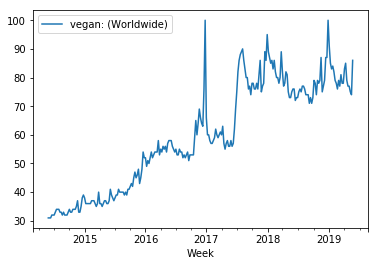

In [24]:
df.plot()

In [26]:
## Since we have set the index, we can now refer to it to filter the data. You can do other things, have a look at them in your own time
df['2018']

,vegan: (Worldwide)
Week,
2018-01-07,89
2018-01-14,87
2018-01-21,85
2018-01-28,86
2018-02-04,83
2018-02-11,86
2018-02-18,82
2018-02-25,80
2018-03-04,80


## Manipulate data to make it time series

Even though our data already has date column, we are converting to a series because we'll use functions that call to series

In [27]:
vegan = df['vegan: (Worldwide)']

In [28]:
vegan.head()

Week
2014-06-01    31
2014-06-08    31
2014-06-15    31
2014-06-22    32
2014-06-29    32
Name: vegan: (Worldwide), dtype: int64

In [29]:
type(vegan)

pandas.core.series.Series

We want to make some predictions. Ideally build a model that predicts from the graph plot above in a similar shape.


## Model = ARIMA (p,d,q)

Need 3 parameters p,d,q


model could be additive or multiplicative - need to experiment with these to get a feel of results
if fluctuations increase with the trend then use multiplicative - so overall plus fluctuations both going up

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(vegan, model='multiplicative',freq=52)


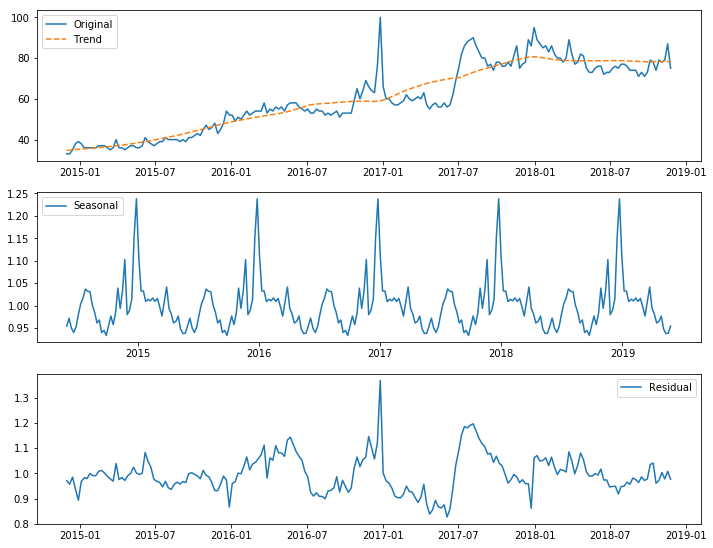

In [32]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(10,10))

plt.figure(1)
plt.subplot(411)
plt.plot(trend*seasonal*residual, label='Original')
plt.plot(trend, label='Trend', linestyle='--')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

plt.tight_layout()



# (Partial) Autocorrelation Function

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

(0, 50)

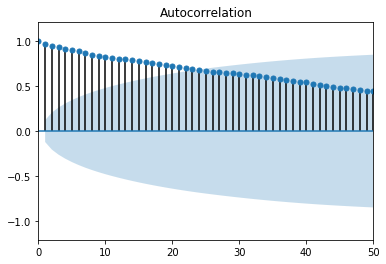

In [35]:
plot_acf(vegan)

plt.xlim(0,50)

Using pandas diff model to differentiate 

In [37]:
diff = vegan.diff(1).dropna()

In [38]:
decomposition = seasonal_decompose(diff, model='additive', freq=52)

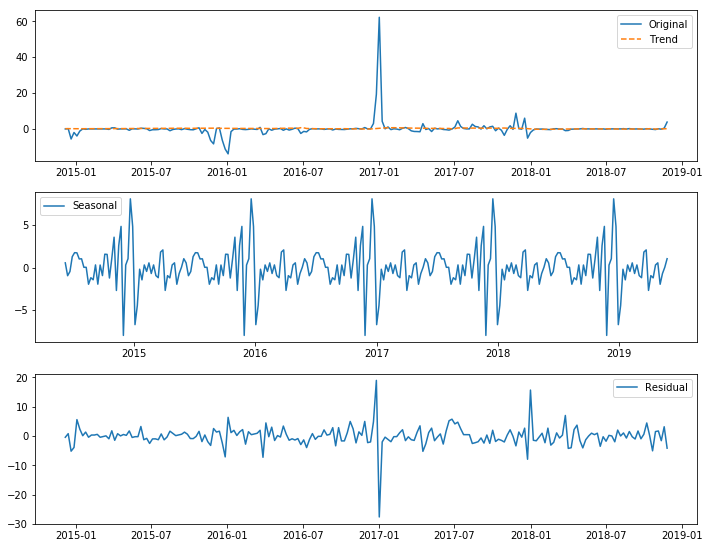

In [41]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(10,10))

plt.figure(1)
plt.subplot(411)
plt.plot(trend*seasonal*residual, label='Original')
plt.plot(trend, label='Trend', linestyle='--')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

plt.tight_layout()



# d = 1 (i.e. num of times differentiate)

(0, 20)

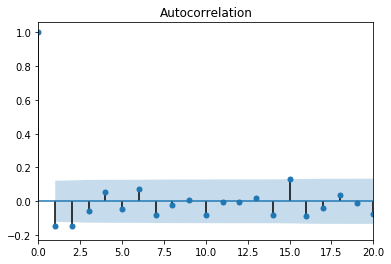

In [43]:
plot_acf(diff)

plt.xlim(0,20)

rule of thumb, to look at the last lag before the points disappear into the blue bar

in this case after 2, it disappears

# q=2 is the value we decided using above graph

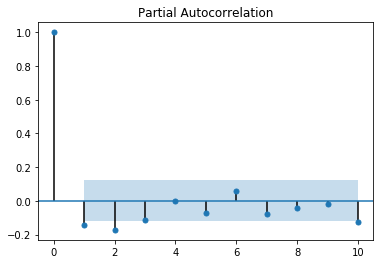

In [49]:
plot_pacf(diff, lags=10)
plt.show()

# p=2 as we're looking for the value before it disappears into the shaded area

# Building the ARIMA model

#### Using Test & Training split

As we're using time series, we need it to predict future. We need to put placeholder for future data it is trying to predict

Cannot use sklearn train test as we have series data

Using pandas functionality, date index 
train data is up till June 2018
test data is from 27 May 2018

In [51]:
train = vegan[:'06-2018'].dropna()
test = vegan['07-2018':].dropna()

In [52]:
train.tail()

Week
2018-05-27    75
2018-06-03    76
2018-06-10    76
2018-06-17    72
2018-06-24    73
Name: vegan: (Worldwide), dtype: int64

In [53]:
test.head()

Week
2018-07-01    73
2018-07-08    75
2018-07-15    76
2018-07-22    75
2018-07-29    77
Name: vegan: (Worldwide), dtype: int64

In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## p,d,q = 2,1,2
model = SARIMAX(train,order=(2,1,2), seasonal_order=(1,1,0,52), enforce_stationarity = False, encorce_invertibility = False)

T:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


In [57]:
results = model.fit()

In [62]:
pred = results.predict(start='07-2018', end = '06-2019')

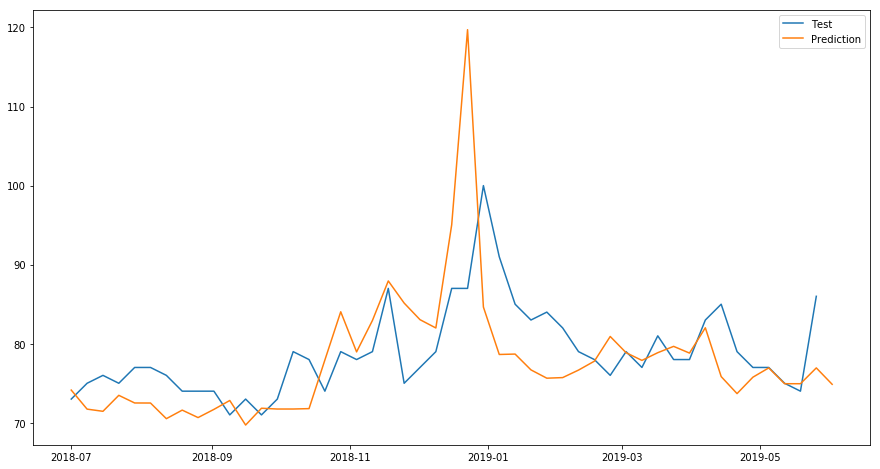

In [65]:
plt.figure(figsize=(15,8))
plt.plot(test, label = 'Test')
plt.plot(pred, label = 'Prediction')
##plt.plot(train, label='Train')
plt.legend(loc='best')

In [66]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                 vegan: (Worldwide)   No. Observations:                  213
Model:             SARIMAX(2, 1, 2)x(1, 1, 0, 52)   Log Likelihood                -323.074
Date:                            Tue, 28 May 2019   AIC                            658.149
Time:                                    16:43:38   BIC                            674.129
Sample:                                06-01-2014   HQIC                           664.626
                                     - 06-24-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3328      0.808      0.412      0.681      -1.251       1.917
ar.L2         -0.4337      0.478     -0.908      0.364      -1.370       0.502
ma.L1         -0.5295      0.834     -0.635      0.526      -2.164       1.105
ma.L2          0.3433      0.650      0.528      0.598      -0.932       1.618
ar.S.L52      -1.0251      0.095    -10.839      0.000      -1.210      -0.840
sigma2        25.9923      1.943     13.375      0.000      22.183      29.801
===================================================================================
Ljung-Box (Q):                       13.83   Jarque-Bera (JB):               431.13
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                             0.06
Prob(H) (two-sided):                  0.01   Kurtosis:                        12.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

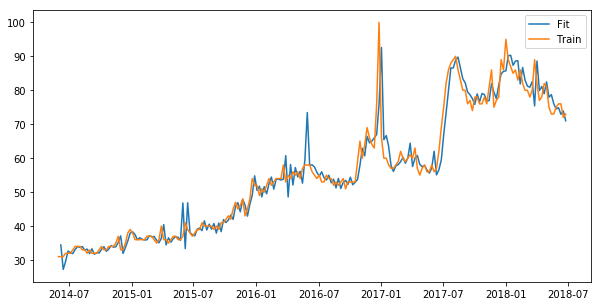

In [69]:
fit= results.predict(start='06-2014', end = '06-2018')[1:] ## this 1: says ignore first point which is a zero

plt.figure(figsize=(10,5))
plt.plot(fit,label='Fit')
plt.plot(train, label = 'Train')
plt.legend(loc='best')